In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import time
import random
import pyplot as plt

In [ ]:
def encodestring(var):
    if var is not None:
        return var.encode('utf-8')

In [ ]:
def scrapePainting(url):
    r = requests.get(url)
    print r, url
    b = BeautifulSoup(r.text, 'html.parser')
    
    url_id = r.url.split('/')[-1]
    
    artist = b.find('a', {'id':'fine-ART-ProductLabelArtistNameLink'})
    if artist is not None:
        artist = b.find('a', {'id':'fine-ART-ProductLabelArtistNameLink'}).text
        
    title = b.find('span', {'id': 'fineArtTitle'})
    if title is not None:
        title = b.find('span', {'id': 'fineArtTitle'}).text
        
    image = re.findall('http://ecx.images-amazon.com/images/I/.*\.jpg', r.text)
    if image is not None:
        image = re.findall('http://ecx.images-amazon.com/images/I/.*\.jpg', r.text)
        
    price = b.find('span', {'id': 'priceblock_ourprice'})
    if price is not None:
        price = b.find('span', {'id': 'priceblock_ourprice'}).text.replace('$','').replace(',', '')
        if '.' in price:
            price = float(price.replace('.', ''))/100
        else:
            price = float(price)
            
    desc = b.find('div', {'id': 'productDescription_feature_div'})
    if desc is not None:
        desc = b.find('div', {'id': 'productDescription_feature_div'}).getText().replace('\n','')
        
    height = None
    width = None
    size = b.find('span', {'id': 'mnba_buybox_size'})
    if size is not None:
        size = [a.strip() for a in b.find('span', {'id': 'mnba_buybox_size'}).text.split('x')]
        if len(size) == 2:
            height = float(size[0].replace('in.','').replace('in','').strip())
            width = float(size[1].replace('in.','').replace('in','').strip())
            depth = 1.
        elif len(size) == 3:
            height = float(size[0].replace('in.','').replace('in','').strip())
            width = float(size[1].replace('in.','').replace('in','').strip())
            depth = float(size[2].replace('in.','').replace('in','').strip())
    
    size_variations = b.find('div', {'id': 'variation_size_name'})
    if size_variations is not None:
        size = [a.strip() for a in size_variations.find('span', {'class': "a-size-base"}).text.split('x')]
        
        if len(size) == 2:
            height = float(size[0].replace('in.','').replace('in','').strip())
            width = float(size[1].replace('in.','').replace('in','').strip())
            depth = 1.
        elif len(size) == 3:
            height = float(size[0].replace('in.','').replace('in','').strip())
            width = float(size[1].replace('in.','').replace('in','').strip())
            depth = float(size[2].replace('in.','').replace('in','').strip())
            
        price = size_variations.find('span', {'class': "a-size-mini"}).text.replace('$','').replace(',', '')
        if '.' in price:
            price = float(price.replace('.', ''))/100
        else:
            price = float(price)
    

    return {'url_id': encodestring(url_id), 'artist': encodestring(artist), 'title':encodestring(title), 'image': image, 'price': price, 
            'description':encodestring(desc), 'height': height, 'width': width, 'size':size}

In [ ]:
scrapePainting('http://www.amazon.com/Walk-Away-21x21-in/dp/B0170E9ARC')

In [ ]:
paintings = []

for page in range(1,219):
    
    page_url = 'http://www.amazon.com/s/ref=lp_6685289011_pg_2?rh=n%3A4991425011%2Cn%3A%214991426011%2Cn%3A6685269011%2Cn%3A6685289011&page='+str(page)+'&ie=UTF8&qid=1462681717'
    r = requests.get(page_url)
    r.text

    b = BeautifulSoup(r.text, 'html.parser')

    url_1 = []
    for link in b.findAll('a', {'class':"a-link-normal a-text-normal"}):
        url_1.append(link.get('href'))
    
    url_list = url_1[::2]

    for url in url_list:
        try:
            paintings.append(scrapePainting(url))
        except Exception as error:
            print error
        time.sleep(random.randint(5,20))
    
    if page % 10 == 0:
        df = pd.DataFrame(paintings)
        df.to_csv("output"+str(page)+".csv", index=False)
    elif page == 218:

df = pd.DataFrame(paintings) 
df.to_csv("final_df.csv", index=False)


In [ ]:
df.head()

In [ ]:
o10 = pd.read_csv('output10.csv')
final = pd.read_csv('final_df.csv')

In [ ]:
final.describe()

#url_rej = o100[o100.isnull()]
#url_rej.head(50)

Adding all the rejeected requests

In [ ]:
paintings_rej = final_df.isnull().url_id
paintings = []

for page in range(1,219):
    
    page_url = 'http://www.amazon.com/s/ref=lp_6685289011_pg_3?rh=n%3A4991425011%2Cn%3A%214991426011%2Cn%3A6685269011%2Cn%3A6685289011&page='+str(page)+'&ie=UTF8&qid=1462820989'
    r = requests.get(page_url)
    r.text

    b = BeautifulSoup(r.text, 'html.parser')

    url_1 = []
    for link in b.findAll('a', {'class':"a-link-normal a-text-normal"}):
        url_1.append(link.get('href'))
    
    url_list = url_1[::2]

    for url in url_list:
        if url is in paintings_rej:
            try:
                paintings.append(scrapePainting(url))
            except Exception as error:
                print error
            time.sleep(random.randint(5,20))
    
    if page % 50 == 0:
        df = pd.DataFrame(paintings)
        df.to_csv("rej_output"+str(page)+".csv", index=False)
    elif page == 218:

df = pd.DataFrame(paintings) 
df.to_csv("final_rej_df.csv", index=False)

In [5]:
import sys
sys.path += ['/usr/local/Cellar/opencv/2.4.12_2']
import numpy as np
import matplotlib.pyplot as plt
import urllib
import cv2
%matplotlib inline

In [13]:
#show image with matplotliib

def url_to_image(url):
    #download the image
    resp = urllib.urlopen(url)
    #convert to NumPy array
    image = np.asarray(bytearray(resp.read()), dtype ='uint8')
    #read it into OpenCV
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    
    return image

a = url_to_image('http://ecx.images-amazon.com/images/I/519lYUvAxDL._QL70_.jpg')
cv_rgb = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

In [17]:
type(cv_rgb)

numpy.ndarray

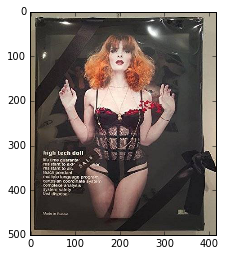

In [16]:
plt.imshow(cv_rgb)
plt.show()

In [7]:
BGRflags = [flag for flag in dir(cv2) if flag.startswith('COLOR_BGR') ]
print BGRflags

['COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YUV', 'COLOR_BGR2YUV_I420', 'COLOR_BGR2YUV_IYUV', 'COLOR_BGR2YUV_YV12', 'COLOR_BGR5552BGR', 'COLOR_BGR5552BGRA', 'COLOR_BGR5552GRAY', 'COLOR_BGR5552RGB', 'COLOR_BGR5552RGBA', 'COLOR_BGR5652BGR', 'COLOR_BGR5652BGRA', 'COLOR_BGR5652GRAY', 'COLOR_BGR5652RGB', 'COLOR_BGR5652RGBA', 'COLOR_BGRA2BGR', 'COLOR_BGRA2BGR555', 'COLOR_BGRA2BGR565', 'COLOR_BGRA2GRAY', 'COLOR_BGRA2RGB', 'COLOR_BGRA2RGBA', 'COLOR_BGRA2YUV_I420', 'COLOR_BGRA2YUV_IYUV', 'COLOR_BGRA2YUV_YV12']


In [11]:
import time as t
t0 = t.time()
cv_rgb = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
t1 = t.time()
dt_cv = t1-t0
print "Conversion took %0.5f seconds" % dt_cv

Conversion took 0.00379 seconds


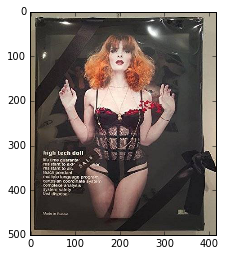

In [12]:
plt.imshow(cv_rgb)
plt.show()